In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf 
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go 
from statsmodels.tsa.seasonal import seasonal_decompose  #zaman serisini bileşene ayırmak için

In [2]:
df = yf.download("AAPL", start="2017-01-01", progress=False)

df.index = pd.to_datetime(df.index)
df.index.name = None
df


#Adj Close= düzeltilmiş kapanış
# Günlük hareketi gösterir ve şiddetini volume belirler. 

Open        High         Low       Close   Adj Close  \
2017-01-03   28.950001   29.082500   28.690001   29.037500   27.023708   
2017-01-04   28.962500   29.127501   28.937500   29.004999   26.993456   
2017-01-05   28.980000   29.215000   28.952499   29.152500   27.130726   
2017-01-06   29.195000   29.540001   29.117500   29.477501   27.433195   
2017-01-09   29.487499   29.857500   29.485001   29.747499   27.684464   
...                ...         ...         ...         ...         ...   
2023-11-29  190.899994  192.089996  188.970001  189.369995  189.369995   
2023-11-30  189.839996  190.320007  188.190002  189.949997  189.949997   
2023-12-01  190.330002  191.559998  189.229996  191.240005  191.240005   
2023-12-04  189.979996  190.050003  187.449997  189.429993  189.429993   
2023-12-05  190.210007  194.399994  190.179993  193.419998  193.419998   

               Volume  
2017-01-03  115127600  
2017-01-04   84472400  
2017-01-05   88774400  
2017-01-06  127007600  
2017-01-09  134247600  
...               ...  
2023-11-29   43014200  
2023-11-30   48794400  
2023-12-01   45679300  
2023-12-04   43389500  
2023-12-05   66371700  

[1743 rows x 6 columns]

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Statistical #####################")
    print(dataframe.describe())
    
check_df(df)

##################### Shape #####################
(1743, 6)
##################### Types #####################
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
##################### Head #####################
                 Open       High        Low      Close  Adj Close     Volume
2017-01-03  28.950001  29.082500  28.690001  29.037500  27.023708  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.993456   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.130726   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.433195  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.684464  134247600
##################### Tail #####################
                  Open        High         Low       Close   Adj Close  \
2023-11-29  190.899994  192.089996  188.970001  189.369995  189.369995   
2023-11-30  189.839996  190.320007  188.19

In [4]:
# baktığımzıda %50lik değer 88 iken mean değeri 99 gelmiş. Dolayısıyla verinin ortalaması sağa kaymış bu çarpıklık trendi sağa yönlü harekete itmiş.
# When we look at it, while the 50% value is 88, the mean value is 99. Therefore, the average of the data has shifted to the right and this skew has pushed the trend to the right.

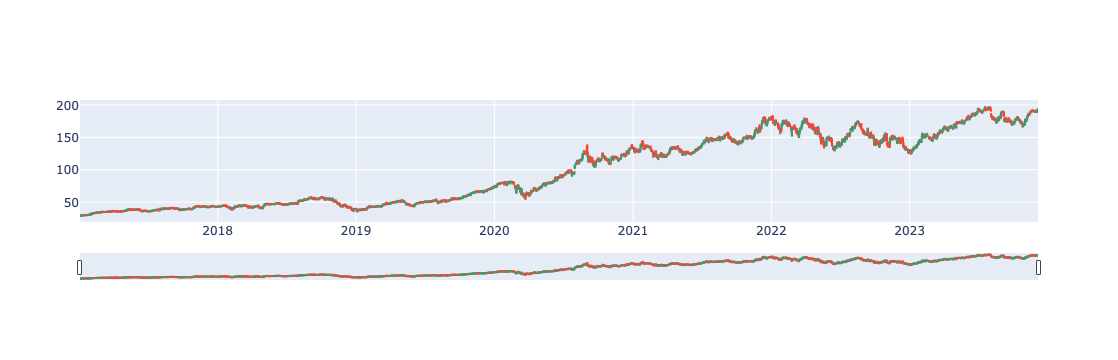

In [5]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                    open=df['Open'], 
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])
fig.show()

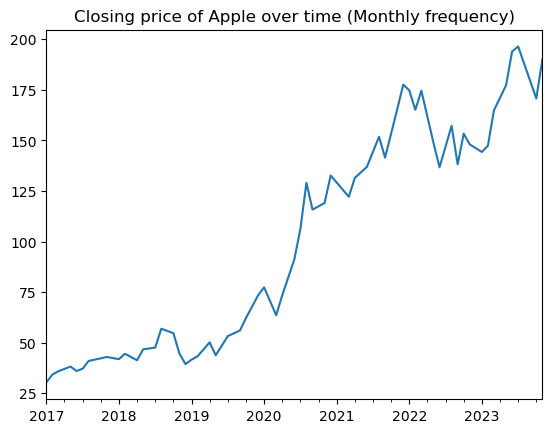

In [6]:
df["Close"].asfreq('M').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
# Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('Closing price of Apple over time (Monthly frequency)')
plt.show()

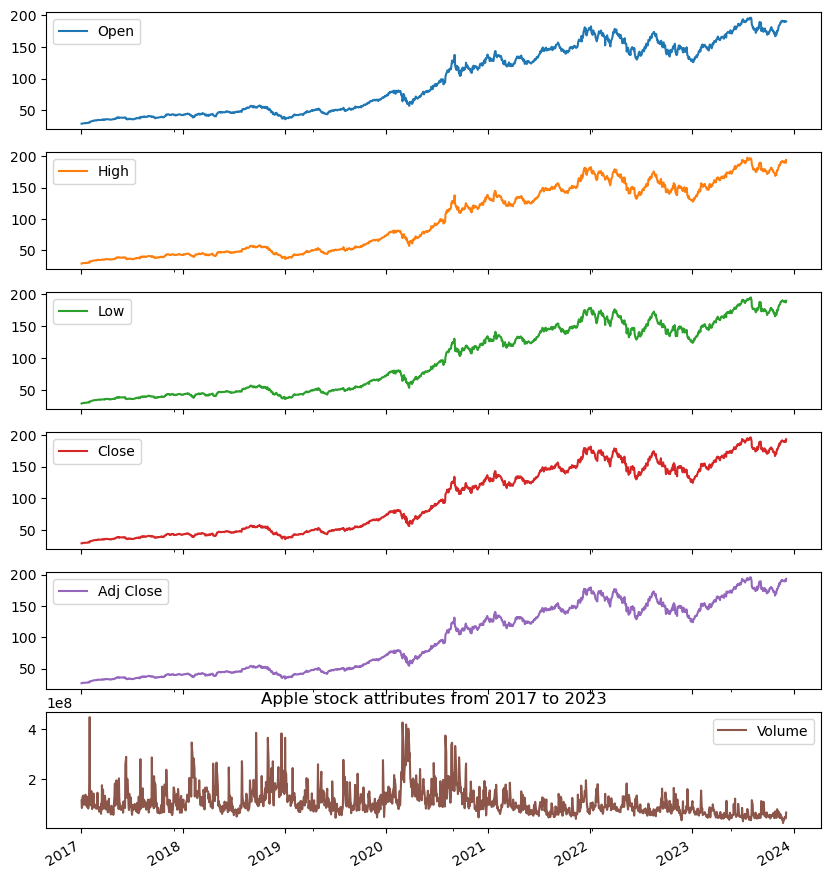

In [7]:
df['2017':'2023'].plot(subplots=True, figsize=(10,12))
plt.title('Apple stock attributes from 2017 to 2023')
plt.show()

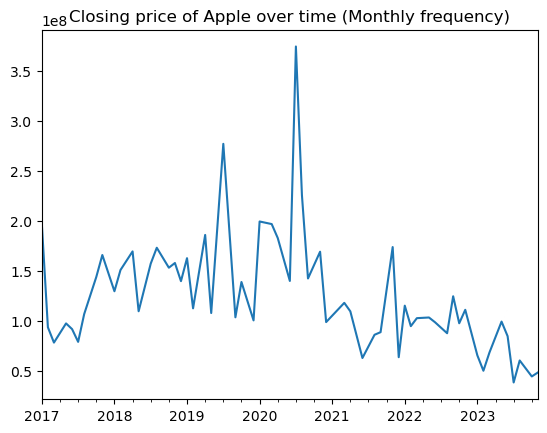

In [8]:
#Volume of Sales
#Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.
#For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. 
#Trading volume, and changes to volume over the course of time, are important inputs for technical traders.
#Hacim, bir varlığın veya menkul kıymetin belirli bir süre içinde, genellikle bir gün boyunca el değiştiren miktarıdır.
# Örneğin, hisse senedi işlem hacmi, günlük açılış ve kapanış arasında işlem gören menkul kıymet hisselerinin sayısını ifade eder. 
#İşlem hacmi ve zaman içinde hacimde meydana gelen değişiklikler, teknik yatırımcılar için önemli girdilerdir.


#total volume of stock being traded each day
df["Volume"].asfreq('M').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
                                                 # Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('Closing price of Apple over time (Monthly frequency)')
plt.show()


In [9]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

# Creating a period
period = pd.Period('2017-01-01')
period

# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

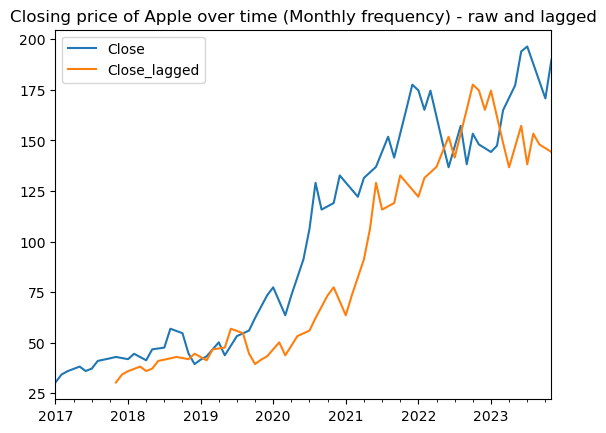

In [10]:
#Comparison of current and 10 months ago close prices.

df["Close"].asfreq('M').interpolate().plot(legend=True)
shifted = df["Close"].asfreq('M').interpolate().shift(10).plot(legend=True)
shifted.legend(['Close','Close_lagged'])
plt.title('Closing price of Apple over time (Monthly frequency) - raw and lagged')
plt.show()

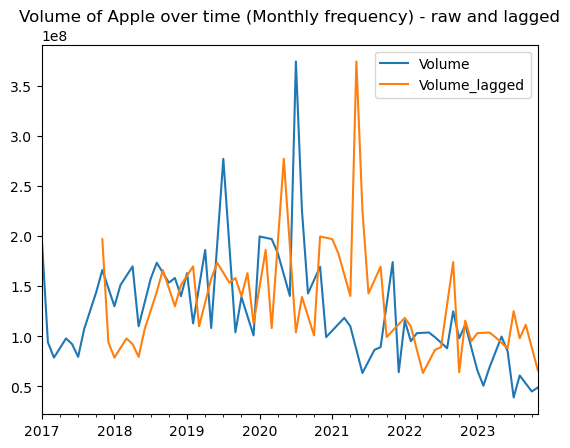

In [11]:
df["Volume"].asfreq('M').interpolate().plot(legend=True)
shifted = df["Volume"].asfreq('M').interpolate().shift(10).plot(legend=True)
shifted.legend(['Volume','Volume_lagged'])
plt.title('Volume of Apple over time (Monthly frequency) - raw and lagged')
plt.show()

In [12]:
df = df.iloc[1:]
df = df.ffill()
df = df.bfill()
df.head()

Open       High        Low      Close  Adj Close     Volume
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.993456   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.130726   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.433195  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.684464  134247600
2017-01-10  29.692499  29.844999  29.575001  29.777500  27.712383   97848400

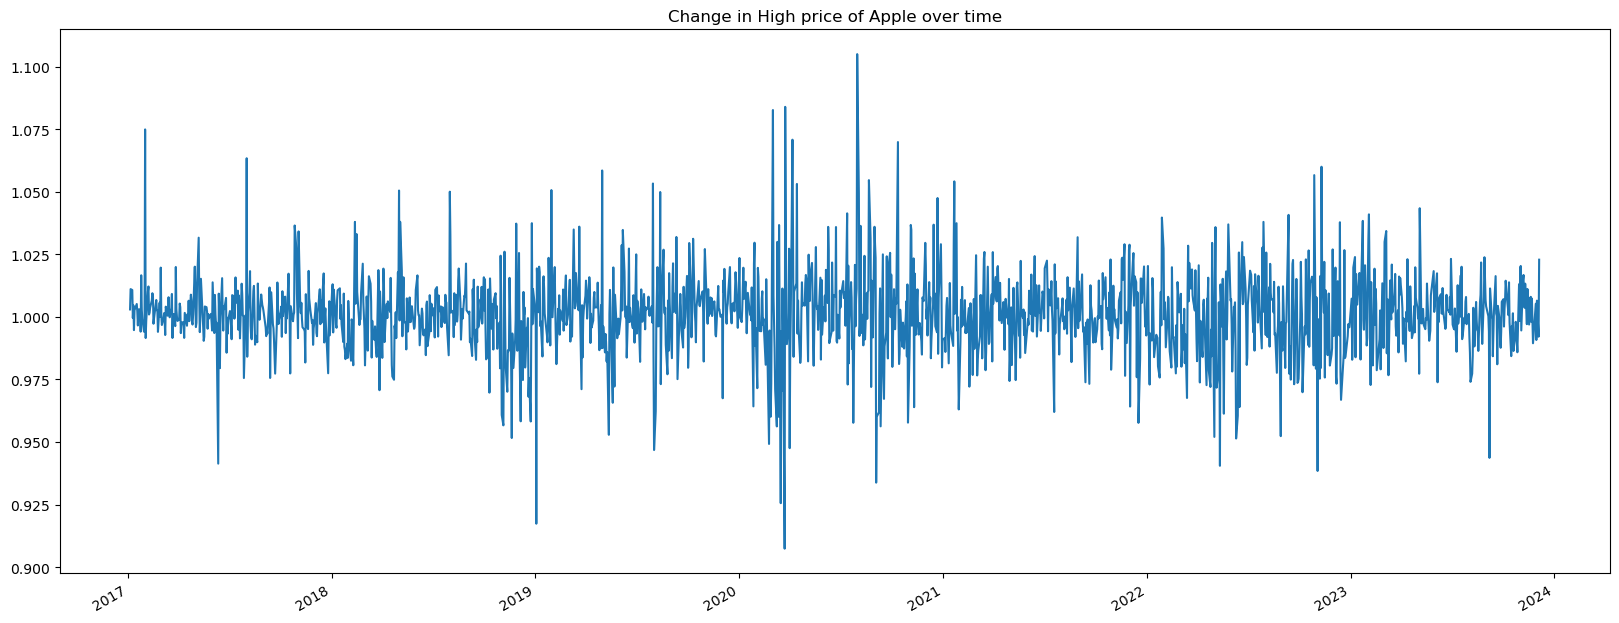

In [17]:
#The purpose of this code is to show the changes in Apple stock high prices over time and to analyse these changes through a line graph.
# It is used to calculate the change of the prices in the "High" column in the Apple stock data set compared to the previous period.

df['Change'] = df.High.div(df.High.shift())
df['Change'].plot(figsize=(20,8))
_ = plt.title('Change in High price of Apple over time')


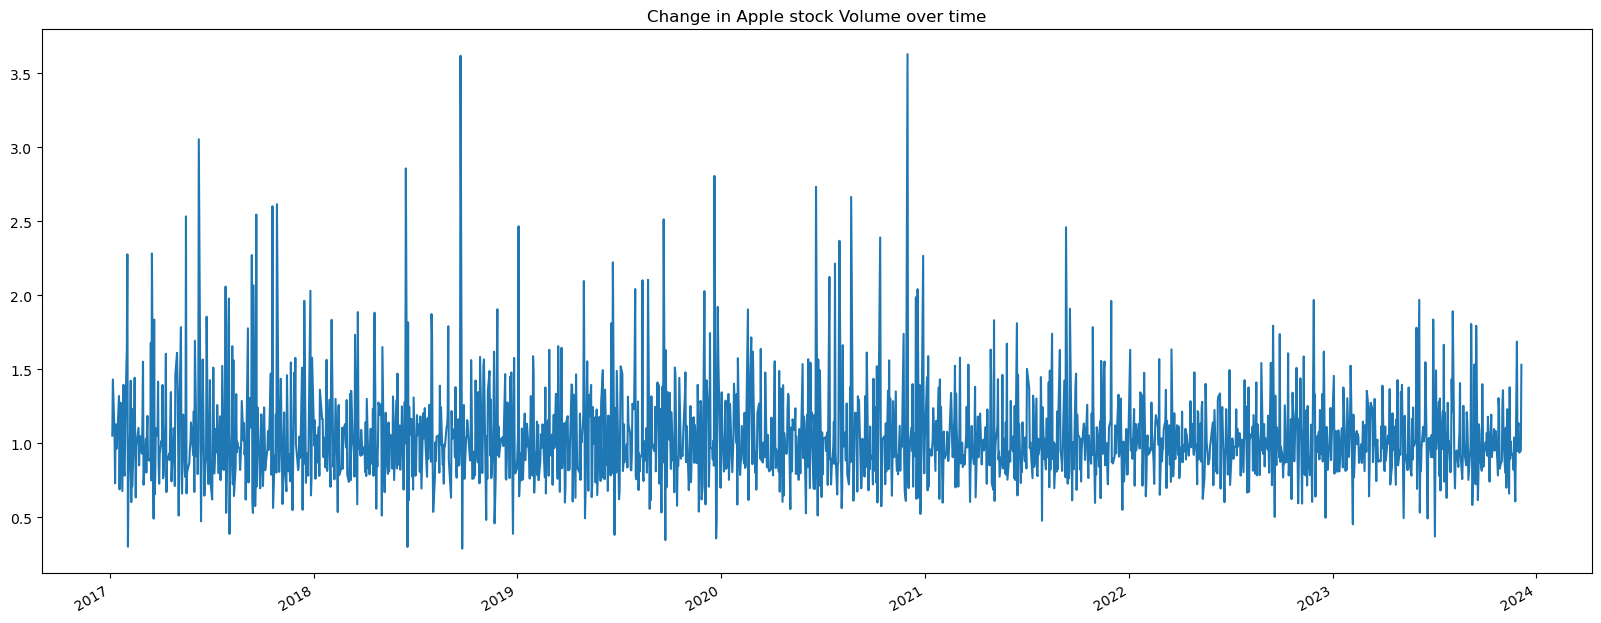

In [18]:
df['Volume_Change'] = df.Volume.div(df.Volume.shift())
df['Volume_Change'].plot(figsize=(20,8))
_ = plt.title('Change in Apple stock Volume over time')

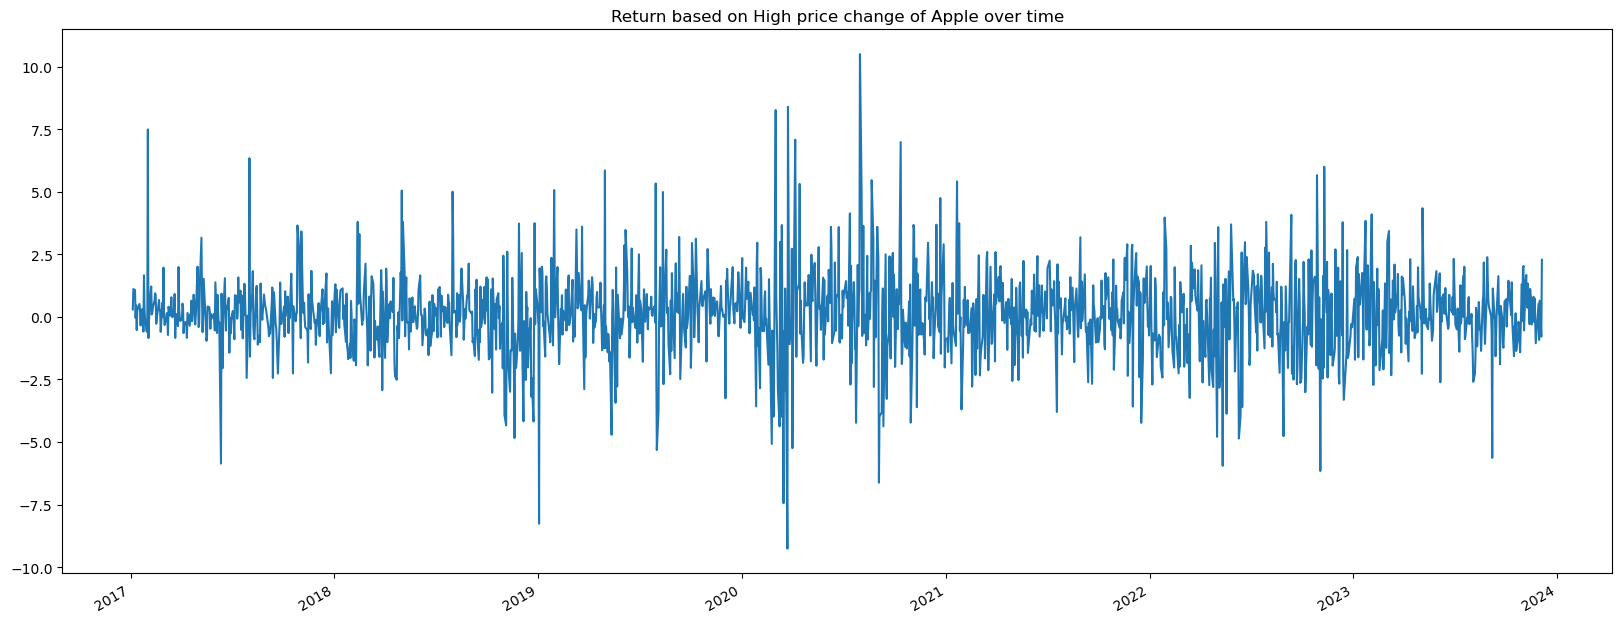

In [20]:
#To calculate the return using the change in Apple stock high prices and to visualise this return on a line graph.
#sub(1) metodu ile 1 çıkartılır (bir önceki döneme göre değişim oranından 1 çıkartılarak).
#mul(100) metodu ile sonuç 100 ile çarpılarak yüzde cinsinden getiri elde edilir.
#Hesaplanan getiriler "Return" adlı yeni bir sütuna atanır.


df['Return'] = df.Change.sub(1).mul(100)
df['Return'].plot(figsize=(20,8))
_ = plt.title('Return based on High price change of Apple over time')


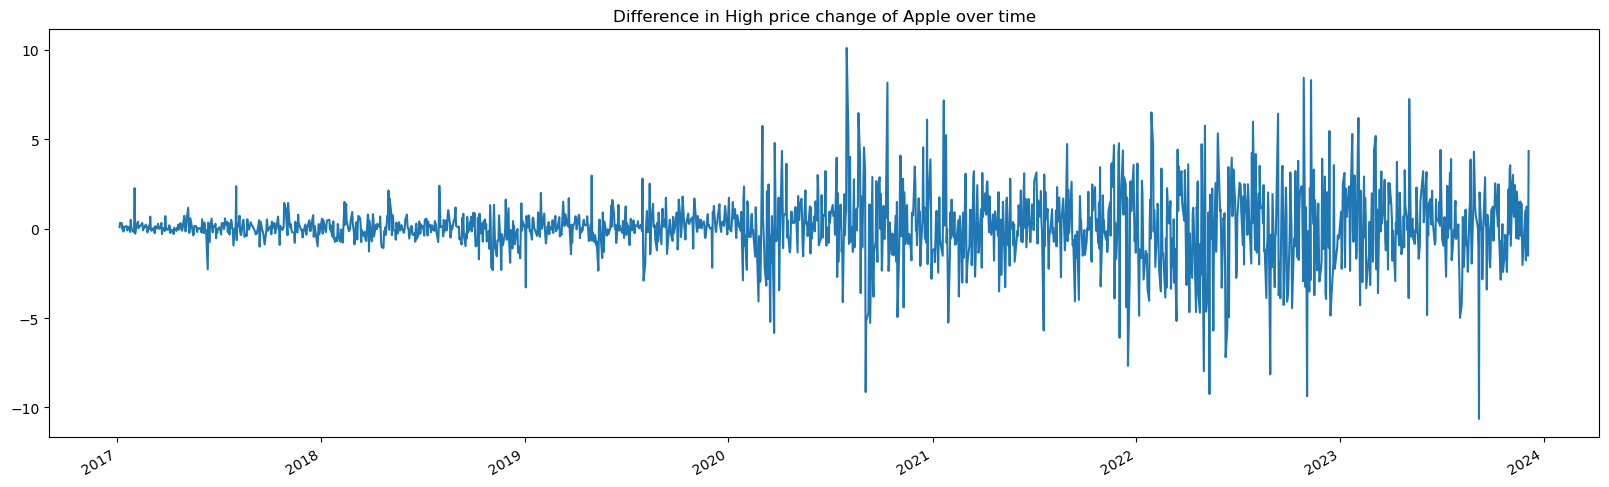

In [21]:
#diff() metodu, bir serideki ardışık öğeler arasındaki farkı hesaplar. Bu durumda, hisse senedi yüksek fiyatlarının ardışık dönemlerdeki farklarını hesaplar.
#Önceki döneme göre fiyat değişimlerini ifade eder.

df.High.diff().plot(figsize=(20,6))
_ = plt.title('Difference in High price change of Apple over time')

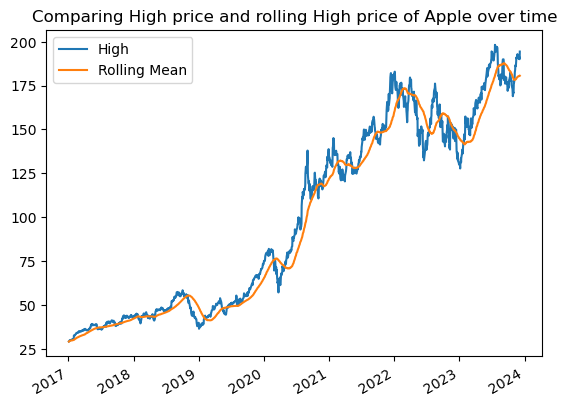

In [22]:
#Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

#Rolling - Same size and sliding

#Expanding - Contains all prior values
#To visualise the changes in Apple stock high prices over time and compare them to a moving average (rolling mean) on a line graph.

# Rolling window functions
rolling_df = df.High.rolling('90D').mean()
df.High.plot()
rolling_df.plot()
_ = plt.title('Comparing High price and rolling High price of Apple over time')
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of Oracle stocks
plt.show()


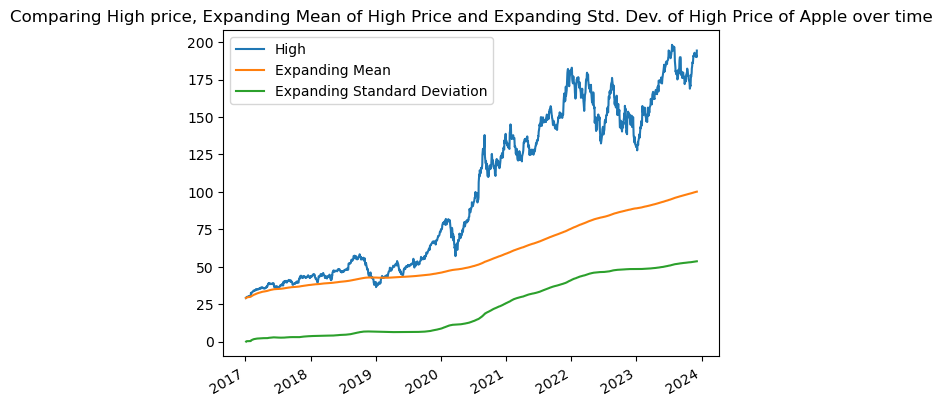

In [25]:
# Expanding window functions
df_mean = df.High.expanding().mean()
df_std = df.High.expanding().std()
df.High.plot()
df_mean.plot()
df_std.plot()
_ = plt.title('Comparing High price, Expanding Mean of High Price and Expanding Std. Dev. of High Price of Apple over time')
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()